In [4]:
import numpy as np
import math 
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import time
plt.style.use('fivethirtyeight')

In [5]:
#get the stock prices
company = input()
df = web.DataReader(company, data_source='yahoo', start='2012-01-01', end = '2020-04-16')
df

AAPL


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-04-09,270.070007,264.700012,268.700012,267.989990,40529100.0,267.266510
2020-04-13,273.700012,265.829987,268.309998,273.250000,32755700.0,272.512329
2020-04-14,288.250000,278.049988,280.000000,287.049988,48748700.0,286.275055


In [6]:
#get number of rows and columns 
df.shape

(2085, 6)

<function matplotlib.pyplot.show(*args, **kw)>

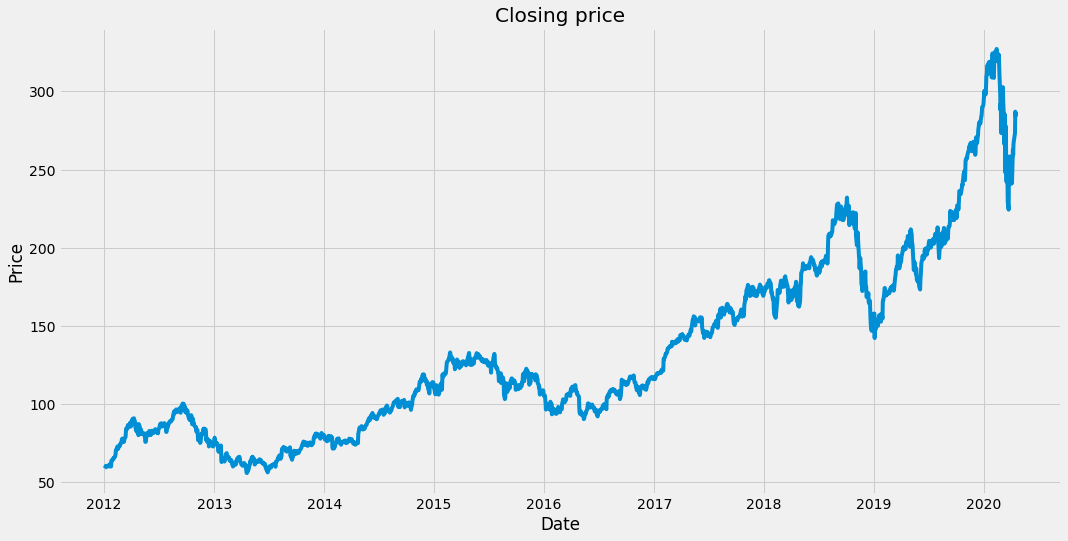

In [7]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Closing price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show

In [8]:
#create df only with closing price
data = df.filter(['Close'])
#covert df to  numpy
dataset = data.values
#get number of rows to train the model on
traning_data_len = math.ceil(len(dataset)*.8)
traning_data_len


1668

In [9]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.85206874],
       [0.84241547],
       [0.85074239]])

In [10]:
#create training data
#create scaled training dataset
train_data = scaled_data[:traning_data_len,:]

#split data x_train and y_train
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()


[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01

In [11]:
#convert X_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [12]:
#reshape the data
#LSTM model expect dataset with 3 dimensions but we have data set with only 2 
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1608, 60, 1)

In [13]:
#build LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
#compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)


Epoch 1/1
1608/1608 [==============================] - 54s 33ms/step - loss: 7.3021e-04


In [16]:
 #create the testing dataset 
#create a new array containing last 20 per cent of scaled values 
test_data = scaled_data[traning_data_len-60:,:]
#create datasets x_test and y_test 
x_test = []
y_test = dataset[traning_data_len :,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    if i <=60:
        print(x_test)
print(y_test[0])

[array([0.48767543, 0.48925977, 0.48675431, 0.48528055, 0.48295932,
       0.495376  , 0.50123428, 0.50668727, 0.50915585, 0.50723997,
       0.50075528, 0.49902358, 0.50289227, 0.49707082, 0.49743929,
       0.49021771, 0.4898493 , 0.47861168, 0.48159609, 0.47776427,
       0.47577463, 0.46564236, 0.47396922, 0.47297446, 0.47791162,
       0.47647469, 0.48410149, 0.47209017, 0.47754315, 0.48701225,
       0.4966287 , 0.49578129, 0.48668066, 0.4982867 , 0.49939205,
       0.49784458, 0.49983416, 0.49596547, 0.50141851, 0.49979734,
       0.50042369, 0.50554509, 0.51225084, 0.51000332, 0.49810246,
       0.49416012, 0.49556017, 0.53686302, 0.5585645 , 0.5607752 ,
       0.56475443, 0.55753286, 0.55804868, 0.56405437, 0.55908033,
       0.56401749, 0.56725984, 0.56906525, 0.5804134 , 0.59610919])]
[215.46000671]


In [17]:
x_test = np.array(x_test)
x_test.shape[1]

60

In [18]:
#reshape x_test data 
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))


In [19]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [20]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.03804532057947392

/home/syl9w/diplomka/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


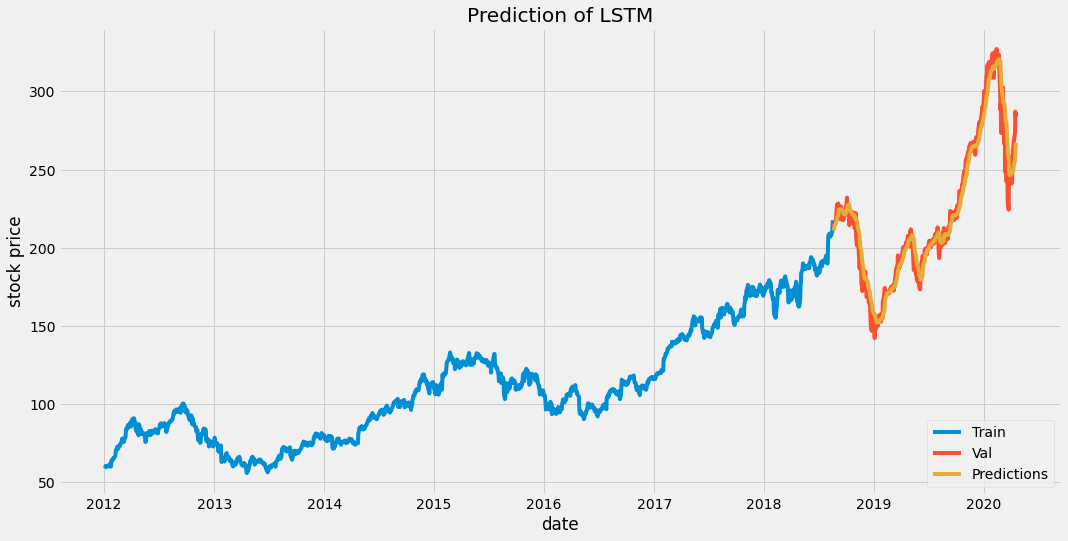

In [21]:
#plot data
train = data[:traning_data_len]
valid = data[traning_data_len:]
valid['Predictions']= predictions
plt.figure(figsize=(16,8))
plt.title('Prediction of LSTM')
plt.xlabel('date')
plt.ylabel('stock price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

/home/syl9w/diplomka/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


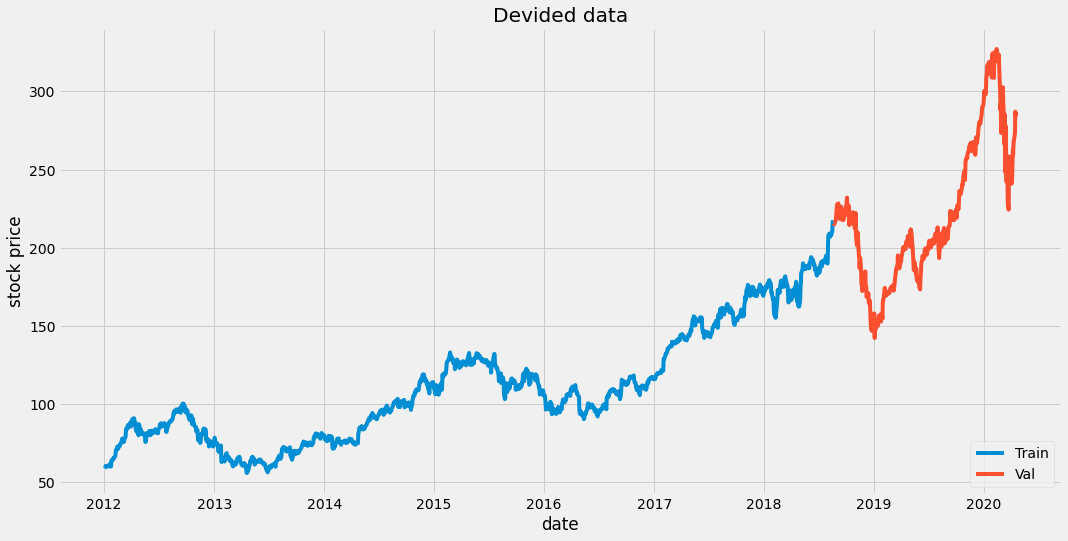

In [25]:
#plot data
train = data[:traning_data_len]
valid = data[traning_data_len:]
valid['Predictions']= predictions
plt.figure(figsize=(16,8))
plt.title('Devided data')
plt.xlabel('date')
plt.ylabel('stock price')
plt.plot(train['Close'])
plt.plot(valid[['Close']])
plt.legend(['Train', 'Val'], loc='lower right')

In [22]:
#show the actual price and predicted price
valid

,Close,Predictions
Date,,
2018-08-20,215.460007,210.937912
2018-08-21,215.039993,212.139908
2018-08-22,215.050003,213.149872
2018-08-23,215.490005,213.967072
2018-08-24,216.160004,214.645157
...,...,...
2020-04-09,267.989990,253.061737
2020-04-13,273.250000,255.697281
2020-04-14,287.049988,258.754852


In [23]:
company_quote = web.DataReader(company, data_source='yahoo', start='2012-01-01', end = '2020-04-14')
new_df = company_quote.filter(['Close'])
last_60 = new_df[-60:].values
last_60 = scaler.transform(last_60)
x_test = []
x_test.append(last_60)
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[262.97464]]
